<a href="https://colab.research.google.com/github/FedorYatsenko/NN_Labs/blob/master/Lab2_classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Яценко Федір
### Варіант 17

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

### Load data

In [2]:
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/lab2/"

files = ["s001.csv",	"s103.csv",	"s205.csv",	"s306.csv",	"s007.csv",	"s109.csv",	"s211.csv"]

data = []
for f in files:
  data_f = np.genfromtxt(path + f, delimiter=',')
  data.append(data_f)
  print(f'File "{f}": {data_f.shape}')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
File "s001.csv": (200, 3)
File "s103.csv": (300, 3)
File "s205.csv": (1600, 3)
File "s306.csv": (2500, 3)
File "s007.csv": (1000, 3)
File "s109.csv": (3000, 3)
File "s211.csv": (9725, 3)


### Show data

{0.0, 1.0}


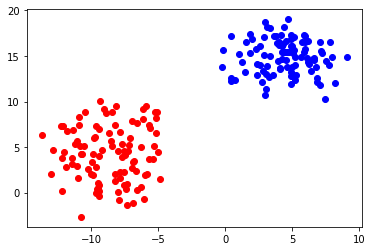

{0.0, 1.0, 2.0}


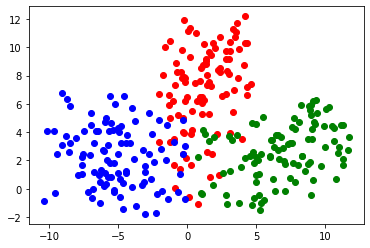

{0.0, 1.0, 2.0, 3.0}


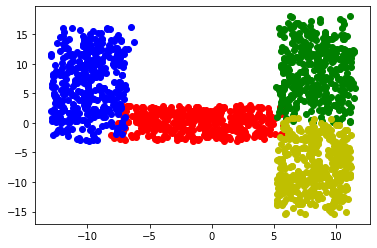

{0.0, 1.0, 2.0, 3.0, 4.0}


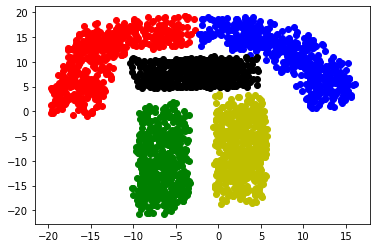

{0.0, 1.0}


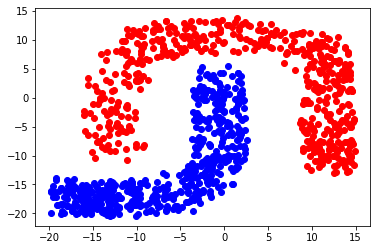

{0.0, 1.0, 2.0}


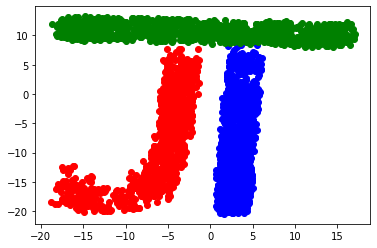

{0.0, 1.0, 2.0, 3.0}


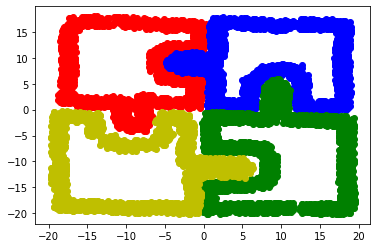

In [88]:
for d in data:
  print(set(d[:, -1]))
  x1 = [x for x, _, g in d if g == 0]
  y1 = [y for _, y, g in d if g == 0]
  x2 = [x for x, _, g in d if g == 1]
  y2 = [y for _, y, g in d if g == 1]
  x3 = [x for x, _, g in d if g == 2]
  y3 = [y for _, y, g in d if g == 2]
  x4 = [x for x, _, g in d if g == 3]
  y4 = [y for _, y, g in d if g == 3]
  x5 = [x for x, _, g in d if g == 4]
  y5 = [y for _, y, g in d if g == 4]

  plt.plot(x1, y1, 'ro', x2, y2, 'bo', x3, y3, 'go', x4, y4, 'yo', x5, y5, 'ko')
  plt.show()

### Create model

In [0]:
def get_model(shape):
  model = Sequential([
    Dense(4, activation="sigmoid"),
    Dense(shape, activation="sigmoid")
  ])

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

### Visualization

In [0]:
def plot_boundary(model, x_train, y_trian):
    x_min, x_max = x_train[:,0].min() - 0.2, x_train[:,0].max() + 0.2
    y_min, y_max = x_train[:,1].min() - 0.2, x_train[:,1].max() + 0.2

    x, y = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    mod = model.predict_classes(np.c_[x.ravel(), y.ravel()], verbose=0)
    mod = mod.reshape(x.shape)
    figur = plt.figure(figsize=(9, 9))
    plt.contourf(x, y, mod, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_trian, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

### Output

In [0]:
def get_best_epoch(history):
  loss, acc, epoch = None, 0, 0
  for i, li in enumerate(history.history['loss']):
    if loss is None or li < loss:
      epoch, loss, acc = i + 1, li, history.history['acc'][i]
  return loss, acc, epoch


def ptint_all(model, history):
  print(f"Layers: {len(model.layers)}")
  for i, l in enumerate(model.layers):
    conf = l.get_config()
    print(f"\tlayer {i}: count={conf['units']}, activation={conf['activation']}")

  loss, acc, epoch = get_best_epoch(history)

  print(f"loss function: 'categorical_crossentropy'\nloss={loss}\naccuracy={acc}\nepoch={epoch}\noptimizer:'rmsprop'\n\n")


### Process data

In [0]:
def process_data(d, model, epochs=100):
  x_train, y_train = d[:, :-1], to_categorical(d[:, -1])

  #es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30, restore_best_weights=True)
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=20, verbose=0) #, shuffle=True, callbacks=[es])

  plot_boundary(model, x_train, d[:, -1])
  ptint_all(model, history)

### File 0

(200, 3)


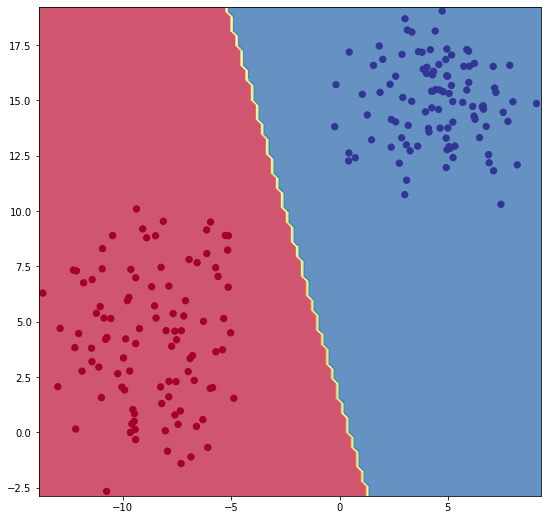

Layers: 2
	layer 0: count=8, activation=sigmoid
	layer 1: count=2, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.03883067928254604
accuracy=1.0
epoch=60
optimizer:'rmsprop'




In [59]:
print(data[0].shape)
model = Sequential([
  Dense(8, activation="sigmoid", use_bias=True),
  Dense(2, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[0], model, 60)

### File 1

(300, 3)


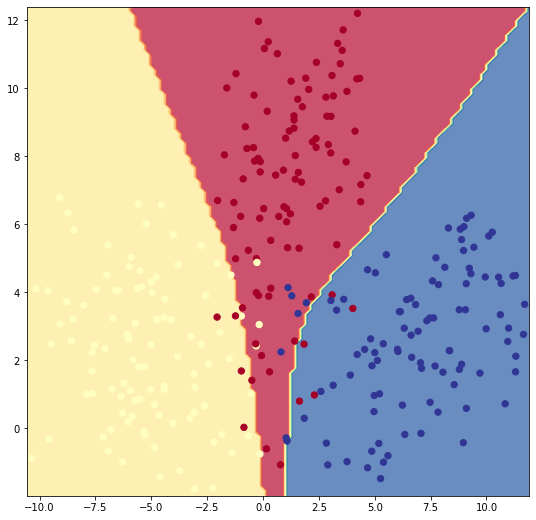

Layers: 5
	layer 0: count=150, activation=sigmoid
	layer 1: count=150, activation=sigmoid
	layer 2: count=150, activation=sigmoid
	layer 3: count=150, activation=sigmoid
	layer 4: count=3, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.13937858790159224
accuracy=0.9366666674613953
epoch=99
optimizer:'rmsprop'




In [50]:
print(data[1].shape)
model = Sequential([
  Dense(150, activation="sigmoid", use_bias=True),
  Dense(150, activation="sigmoid", use_bias=True),
  Dense(150, activation="sigmoid", use_bias=True),
  Dense(150, activation="sigmoid", use_bias=True),
  Dense(3, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

process_data(data[1], model, epochs=100)

### File 2

(1600, 3)


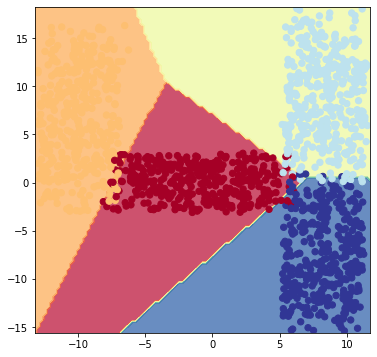

Layers: 1
	layer 0: count=4, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.07325764023698866
accuracy=0.9712499976158142
epoch=600
optimizer:'rmsprop'




In [19]:
print(data[2].shape)
model = Sequential([
  # Dense(4, activation="sigmoid", use_bias=True),
  Dense(4, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[2], model, epochs=600)

### File 3

(2500, 3)


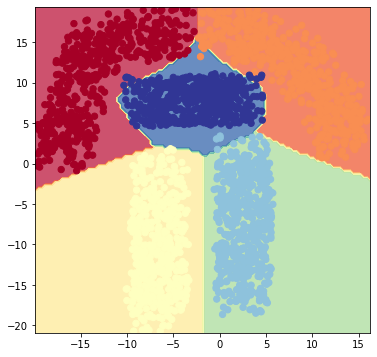

Layers: 2
	layer 0: count=20, activation=sigmoid
	layer 1: count=5, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.060324990216642616
accuracy=0.9904000163078308
epoch=50
optimizer:'rmsprop'




In [25]:
print(data[3].shape)
model = Sequential([
  Dense(20, activation="sigmoid", use_bias=True),
  Dense(5, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[3], model, epochs=50)

### File 4

(1000, 3)


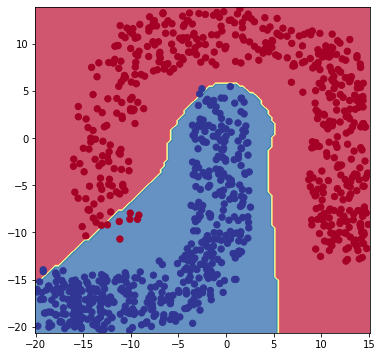

Layers: 2
	layer 0: count=80, activation=sigmoid
	layer 1: count=2, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.03717375327832997
accuracy=0.9879999756813049
epoch=50
optimizer:'rmsprop'




In [29]:
print(data[4].shape)
model = Sequential([
  Dense(80, activation="sigmoid", use_bias=True),
  Dense(2, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[4], model, epochs=50)

### File 5

(3000, 3)


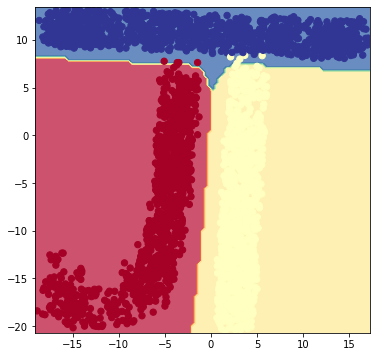

Layers: 2
	layer 0: count=9, activation=sigmoid
	layer 1: count=3, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.01190832779238311
accuracy=0.996666669845581
epoch=50
optimizer:'rmsprop'




In [31]:
print(data[5].shape)
model = Sequential([
  Dense(9, activation="sigmoid", use_bias=True),
  Dense(3, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[5], model, epochs=50)

### File 6

(9725, 3)


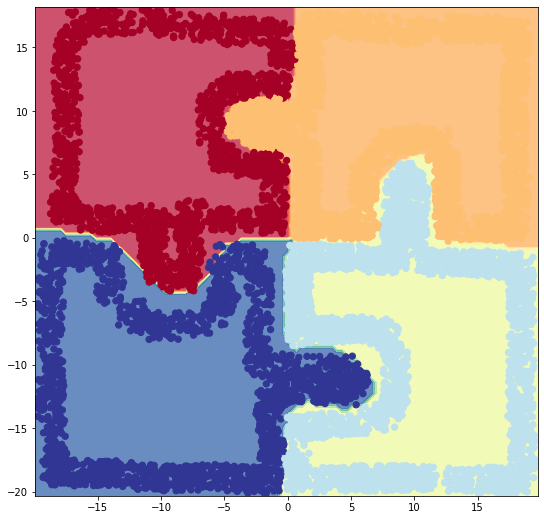

Layers: 3
	layer 0: count=80, activation=sigmoid
	layer 1: count=80, activation=sigmoid
	layer 2: count=4, activation=sigmoid
loss function: 'categorical_crossentropy'
loss=0.04976450426346601
accuracy=0.9848843216896057
epoch=50
optimizer:'rmsprop'




In [42]:
print(data[6].shape)
model = Sequential([
  Dense(80, activation="sigmoid", use_bias=True),
  Dense(80, activation="sigmoid", use_bias=True),
  Dense(4, activation="sigmoid", use_bias=True)
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

process_data(data[6], model, epochs=50)